In [6]:
from Bio import Entrez, SeqIO, pairwise2
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
print(sns.__version__)
print(pd.__version__)
print(np.__version__)


0.12.2
1.3.5
1.21.5


In [7]:
gene_names = ["AAC3", "PET9",
              "AAD1", "AAD3", "AAD4", "AAD10", "AAD14", "AAD15", 
              "ADE16", "ADE17",
              "ADH1", "ADH2", "ADH3", 
              "ALD2", "ALD3", "ALD4", "ALD5", "ALD6",
              "ANB1", "HYP2",
              "ARF1", "ARF2",
              "ASP3-1", "ASP3-2", "ASP3-3", "ASP3-4",
              "BMH1", "BMH2",
              "COS1", "COS2", "COS3", "COS4", "COS5", "COS6", "COS7", 
              "CUP1-1", "CUP1-2",
              "DDI2", "DDI3",
              "DOG1", "DOG2",
              "EFT1", "EFT2",
              "ENA1", "ENA2", "ENA3", "ENA4", "ENA5",
              "ENO1", "ENO2", "ERR1", "ERR2", "ERR3", 
              "ERR1", "ERR2", "ERR3", "ERR4",
              "FEX1", "FEX2",
              "FLO1", "FLO5", "FLO9", 
              "GDH1", "GDH3",
              "GEX1", "GEX2",
              "GND1", "GND2",
              "GSC2", "FKS1", "GSP1", "GSP2",
              "HTA1", "HTA2", "HTB1", "HTB2", "HHT1", "HHT2", "HHF1", "HHF2",
              "HSP32", "HSP33",
              "HSP82", "HSC82",
              "HXT1", "HXT2", "HXT3", "HXT4", "HXT5", "HXT6", "HXT7", "HXT8", "HXT9",
              "HXT10", "HXT11", "HXT12", "HXT13", "HXT15", "HXT16", "HXT17", "GAL2",
              "IMA1", "IMA2", "IMA3", "IMA4", 
              "IMD1", "IMD2", "IMD3", "IMD4",
              "LYS20", "LYS21",
              "MAL12", "MAL32",
              "MAN1", "MAN2", "DSF1",
              "MEP1", "MEP3",
              "MPH2", "MPH3",
              "MST27", "MST28",
              "NHP6A", "NHP6B",
              "PAU1", "PAU2", "PAU3", "PAU4", "PAU5", "PAU6", "PAU8", "PAU10", "PAU11", "PAU12", "PAU13", "PAU14", 
              "PAU15", "PAU16", "PAU17", "PAU18", "PAU19", "PAU20", "PAU21", "PAU22", "PAU23", "PAU24",
              "PDC1", "PDC5", "PDC6",
              "PHO3", "PHO5", "PHO11", "PHO12",
              "PMP1", "PMP2",
              "PPH21", "PPH22",
              "PRS2", "PRS4",
              "PYC1", "PYC2",
              "RPL4A", "RPL4B",
              "RPL6A", "RPL6B",
              "RPL7A", "RPL7B",
              "RPL12A", "RPL12B",
              "RPL13A", "RPL13B",
              "RPL15A", "RPL15B",
              "RPL16A", "RPL16B",
              "RPL17A", "RPL17B",
              "RPL18A", "RPL18B",
              "RPL19A", "RPL19B",
              "RPL21A", "RPL21B",
              "RPL22A", "RPL22B",
              "RPL23A", "RPL23B",
              "RPL24A", "RPL24B",
              "RPL26A", "RPL26B",
              "RPL27A", "RPL27B",
              "RPL33A", "RPL33B",
              "RPL34A", "RPL34B",
              "RPL35A", "RPL35B",
              "RPL36A", "RPL36B",
              "RPL37A", "RPL37B",
              "RPS1A", "RPS1B",
              "RPS6A", "RPS6B",
              "RPS8A", "RPS8B",
              "RPS9A", "RPS9B",
              "RPS11A", "RPS11B",
              "RPS14A", "RPS14B",
              "RPS15A", "RPS15B",
              "RPS16A", "RPS16B",
              "RPS17A", "RPS17B",
              "RPS18A", "RPS18B",
              "RPS21A", "RPS21B",
              "RPS24A", "RPS24B",
              "RPS27A", "RPS27B",
              "SAM1", "SAM2", "SAM4",
              "SER3", "SER33",
              "SNO1", "SNO2", "SNO3", "SNZ1", "SNZ2", "SNZ3",
              "SOR1", "SOR2",
              "SSA1", "SSA2", "SSA3", "SSA4",
              "SSB1", "SSB2",
              "SSF1", "SSF2",
              "TDH1", "TDH2", "TDH3",
              "TEF1", "TEF2",
              "THI5", "THI7", "THI11", "THI12", "THI13", "THI20", "THI21", "THI72",
              "TIF1", "TIF2",
              "TPO2", "TPO3",
              "TRR1", "TRR2",
              "TSA1", "TSA2",
              "TUB1", "TUB3",
              "UBC4", "UBC5",
              "VBA3", "VBA5",
              "VTH1", "VTH2",
              "YRF1-1", "YRF1-2", "YRF1-3", "YRF1-4", "YRF1-5", "YRF1-6", "YRF1-7", "YRF1-8" 
             ]

Fetch the refseq identifiers for all the genes

In [8]:
Entrez.email = "aurele.piazza@ens-lyon.fr"

def get_refseq_id(gene_name, organism="Saccharomyces cerevisiae"):
    """Fetch the RefSeq mRNA accession for a gene from NCBI Gene database."""
    try:
        # Search in the Gene database
        query = f"{gene_name}[Gene Name] AND {organism}[Organism]"
        search = Entrez.esearch(db="gene", term=query, retmode="xml")
        result = Entrez.read(search)
        search.close()

        if not result["IdList"]:
            print(f"[!] No Gene ID found for {gene_name}")
            return None

        gene_id = result["IdList"][0]

        # Fetch gene summary
        handle = Entrez.efetch(db="gene", id=gene_id, retmode="xml")
        records = Entrez.read(handle)
        handle.close()

        # Try to extract RefSeq mRNA accession
        for gene in records:
            try:
                for item in gene['Entrezgene_locus']:
                    for tag in item['Gene-commentary_products']:
                        accession = tag['Gene-commentary_accession']
                        if accession.startswith("NM_") or accession.startswith("NR_"):
                            return accession
            except:
                continue
        print(f"[!] RefSeq accession not found for {gene_name}")
        return None

    except Exception as e:
        print(f"[ERROR] {gene_name}: {e}")
        return None

# Run the script
refseq_ids = {}
for gene in gene_names:
    print(f"Fetching RefSeq ID for {gene}...")
    refseq = get_refseq_id(gene)
    if refseq:
        refseq_ids[gene] = refseq
    time.sleep(1)  # NCBI rate limit

print("\nRefSeq mRNA Accessions:")
for gene, refseq in refseq_ids.items():
    print(f"{gene}: {refseq}")

Fetching RefSeq ID for AAC3...
Fetching RefSeq ID for PET9...
Fetching RefSeq ID for AAD1...
[!] No Gene ID found for AAD1
Fetching RefSeq ID for AAD3...
Fetching RefSeq ID for AAD4...
Fetching RefSeq ID for AAD10...
Fetching RefSeq ID for AAD14...
Fetching RefSeq ID for AAD15...
Fetching RefSeq ID for ADE16...
Fetching RefSeq ID for ADE17...
Fetching RefSeq ID for ADH1...
Fetching RefSeq ID for ADH2...
Fetching RefSeq ID for ADH3...
Fetching RefSeq ID for ALD2...
Fetching RefSeq ID for ALD3...
Fetching RefSeq ID for ALD4...
Fetching RefSeq ID for ALD5...
Fetching RefSeq ID for ALD6...
Fetching RefSeq ID for ANB1...
Fetching RefSeq ID for HYP2...
Fetching RefSeq ID for ARF1...
Fetching RefSeq ID for ARF2...
Fetching RefSeq ID for ASP3-1...
Fetching RefSeq ID for ASP3-2...
Fetching RefSeq ID for ASP3-3...
Fetching RefSeq ID for ASP3-4...
Fetching RefSeq ID for BMH1...
Fetching RefSeq ID for BMH2...
Fetching RefSeq ID for COS1...
Fetching RefSeq ID for COS2...
Fetching RefSeq ID for COS3

Fetching RefSeq ID for SSF2...
Fetching RefSeq ID for TDH1...
Fetching RefSeq ID for TDH2...
Fetching RefSeq ID for TDH3...
Fetching RefSeq ID for TEF1...
Fetching RefSeq ID for TEF2...
Fetching RefSeq ID for THI5...
Fetching RefSeq ID for THI7...
Fetching RefSeq ID for THI11...
Fetching RefSeq ID for THI12...
Fetching RefSeq ID for THI13...
Fetching RefSeq ID for THI20...
Fetching RefSeq ID for THI21...
Fetching RefSeq ID for THI72...
Fetching RefSeq ID for TIF1...
Fetching RefSeq ID for TIF2...
Fetching RefSeq ID for TPO2...
Fetching RefSeq ID for TPO3...
Fetching RefSeq ID for TRR1...
Fetching RefSeq ID for TRR2...
Fetching RefSeq ID for TSA1...
Fetching RefSeq ID for TSA2...
Fetching RefSeq ID for TUB1...
Fetching RefSeq ID for TUB3...
Fetching RefSeq ID for UBC4...
Fetching RefSeq ID for UBC5...
Fetching RefSeq ID for VBA3...
Fetching RefSeq ID for VBA5...
Fetching RefSeq ID for VTH1...
Fetching RefSeq ID for VTH2...
Fetching RefSeq ID for YRF1-1...
Fetching RefSeq ID for YRF1-2..

Retrieve the nucleotide fasta sequence for each refseq identifier and compute the sequence similarity matrix of all the gene pairs.

In [9]:

# Step 1: Fetch sequences
def fetch_sequence_from_refseq(accession):
    """Download the nucleotide sequence given a RefSeq accession."""
    try:
        handle = Entrez.efetch(db="nucleotide", id=accession, rettype="fasta", retmode="text")
        seq_record = SeqIO.read(handle, "fasta")
        handle.close()
        return seq_record.seq
    except Exception as e:
        print(f"[ERROR] Failed to fetch {accession}: {e}")
        return None

# Download sequences for all genes
sequences = {}
for gene, accession in refseq_ids.items():
    print(f"Fetching sequence for {gene} ({accession})...")
    seq = fetch_sequence_from_refseq(accession)
    if seq:
        sequences[gene] = seq
    time.sleep(1)  # Be nice to NCBI

# Step 2: Compute similarity between all pairs
def compute_similarity(seq1, seq2):
    """Compute global sequence similarity as identity percentage."""
    alignment = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)[0]
    matches = alignment[2]
    max_len = max(len(seq1), len(seq2))
    return round(matches / max_len, 4)

# Step 3: Create similarity matrix
genes = list(sequences.keys())
matrix = pd.DataFrame(index=genes, columns=genes)

for g1 in genes:
    for g2 in genes:
        if g1 == g2:
            matrix.loc[g1, g2] = 1.0
        else:
            sim = compute_similarity(sequences[g1], sequences[g2])
            matrix.loc[g1, g2] = sim

# Step 4: Output matrix
print("\nPairwise Nucleotide Similarity Matrix:")
print(matrix)

# Optional: save to CSV
matrix.to_csv("gene_similarity_matrix.csv")

Fetching sequence for AAC3 (NM_001178433)...
Fetching sequence for PET9 (NM_001178270)...
Fetching sequence for AAD3 (NM_001178814)...
Fetching sequence for AAD4 (NM_001180303)...
Fetching sequence for AAD10 (NM_001181813)...
Fetching sequence for AAD14 (NM_001183169)...
Fetching sequence for AAD15 (NM_001183418)...
Fetching sequence for ADE16 (NM_001181915)...
Fetching sequence for ADE17 (NM_001182621)...
Fetching sequence for ADH1 (NM_001183340)...
Fetching sequence for ADH2 (NM_001182812)...
Fetching sequence for ADH3 (NM_001182582)...
Fetching sequence for ALD2 (NM_001182674)...
Fetching sequence for ALD3 (NM_001182673)...
Fetching sequence for ALD4 (NM_001183794)...
Fetching sequence for ALD5 (NM_001178964)...
Fetching sequence for ALD6 (NM_001183875)...
Fetching sequence for ANB1 (NM_001181705)...
Fetching sequence for HYP2 (NM_001178849)...
Fetching sequence for ARF1 (NM_001180252)...
Fetching sequence for ARF2 (NM_001180197)...
Fetching sequence for ASP3-1 (NM_001182042)...
Fet

Fetching sequence for RPL24B (NM_001181277)...
Fetching sequence for RPL26A (NM_001182233)...
Fetching sequence for RPL26B (NM_001181163)...
Fetching sequence for RPL27A (NM_001179140)...
Fetching sequence for RPL27B (NM_001180779)...
Fetching sequence for RPL33A (NM_001183957)...
Fetching sequence for RPL33B (NM_001183653)...
Fetching sequence for RPL34A (NM_001180036)...
Fetching sequence for RPL34B (NM_001179402)...
Fetching sequence for RPL35A (NM_001180196)...
Fetching sequence for RPL35B (NM_001180251)...
Fetching sequence for RPL36A (NM_001182701)...
Fetching sequence for RPL36B (NM_001184312)...
Fetching sequence for RPL37A (NM_001183957)...
Fetching sequence for RPL37B (NM_001183653)...
Fetching sequence for RPS1A (NM_001182329)...
Fetching sequence for RPS1B (NM_001182422)...
Fetching sequence for RPS6A (NM_001183904)...
Fetching sequence for RPS6B (NM_001178529)...
Fetching sequence for RPS8A (NM_001178312)...
Fetching sequence for RPS8B (NM_001178993)...
Fetching sequence f

Filter the table to remove all similarity scores below 85% and plot the similarity matrix

In [12]:
matrix = matrix.applymap(lambda x: x if float(x) >= 0.7 else "")

# Convert non-numeric (empty string) to NaN
matrix_filtered = matrix.replace("", np.nan).astype(float)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matrix_filtered, annot=False, cmap="viridis", vmin=0.7, vmax=1, linewidths=0, linecolor='white')

plt.title("Pairwise Nucleotide Similarity (RefSeq genes ≥ 0.7)")
plt.tight_layout()
plt.savefig("similarity_heatmap_full_278genes_70percent.pdf", dpi=300)
plt.show()

ValueError: could not convert string to float: 

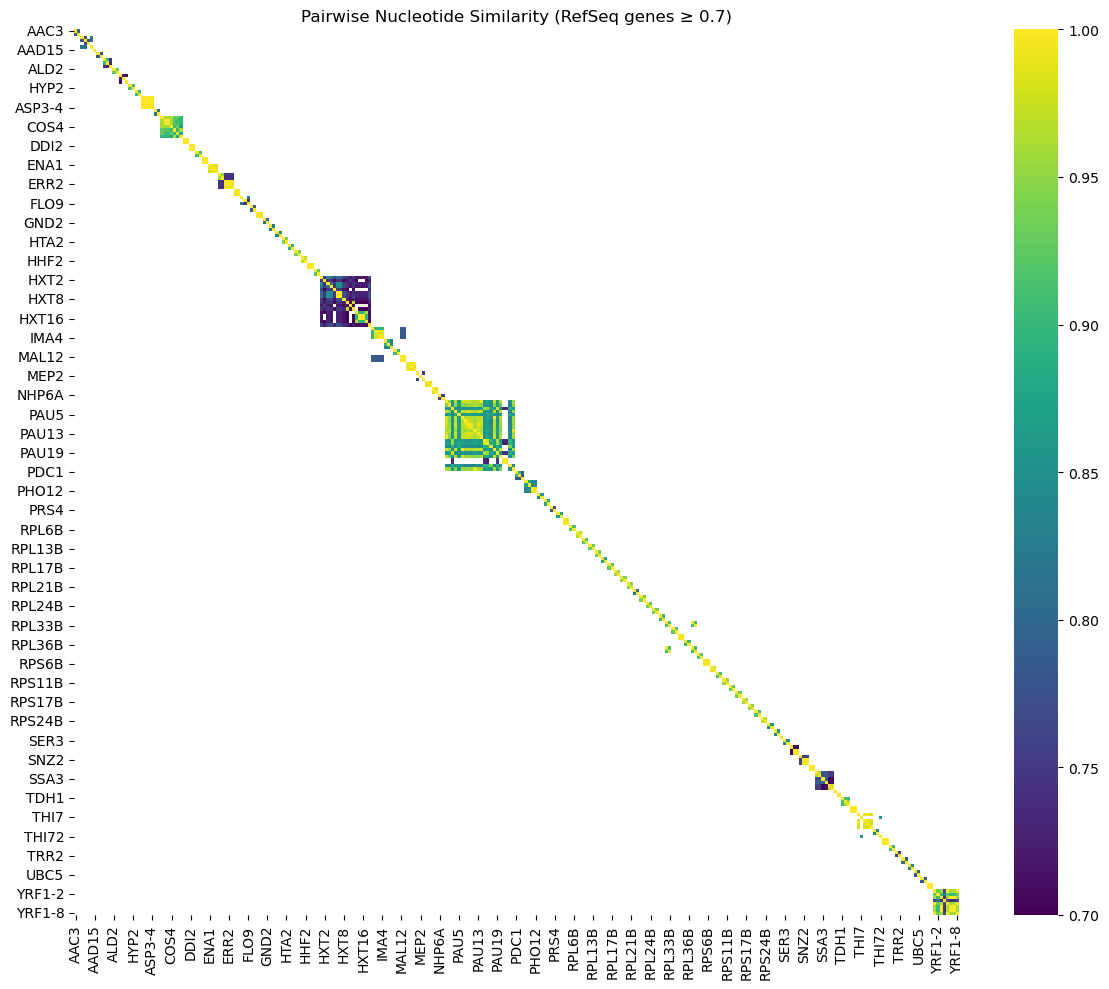

In [19]:
directory="/your_directory/"
file_path = str(directory + "gene_similarity_matrix_278genes.csv")
df = pd.read_csv(file_path, header=0, index_col=0)


matrix = df.applymap(lambda x: x if float(x) >= 0.7 else "")

# Convert non-numeric (empty string) to NaN
matrix_filtered = matrix.replace("", np.nan).astype(float)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matrix_filtered, annot=False, cmap="viridis", vmin=0.7, vmax=1, linewidths=0, linecolor='white')

plt.title("Pairwise Nucleotide Similarity (RefSeq genes ≥ 0.7)")
plt.tight_layout()
plt.savefig("similarity_heatmap_full_278genes_70percent.pdf", dpi=300)
plt.show()